In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore')


In [3]:
data = pd.read_excel('bankdataset.xlsx')
data.head()

,Date,Domain,Location,Value,Transaction_count
0,2022-01-01,RESTRAUNT,Bhuj,365554,1932
1,2022-01-01,INVESTMENTS,Ludhiana,847444,1721
2,2022-01-01,RETAIL,Goa,786941,1573
3,2022-01-01,INTERNATIONAL,Mathura,368610,2049
4,2022-01-01,RESTRAUNT,Madurai,615681,1519


In [4]:
# pd.set_option('display.float_format', '{:.2}'.format)


In [5]:
data['Year'] = data['Date'].dt.year

In [6]:
data['Month'] = data['Date'].dt.month

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004480 entries, 0 to 1004479
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Date               1004480 non-null  datetime64[ns]
 1   Domain             1004480 non-null  object        
 2   Location           1004480 non-null  object        
 3   Value              1004480 non-null  int64         
 4   Transaction_count  1004480 non-null  int64         
 5   Year               1004480 non-null  int32         
 6   Month              1004480 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(2)
memory usage: 46.0+ MB


In [8]:

data[['Value','Transaction_count']].describe()

,Value,Transaction_count
count,1.004480e+06,1.004480e+06
mean,7.498478e+05,1.473808e+03
std,2.609129e+05,6.203409e+02
min,2.984230e+05,4.000000e+02
25%,5.235588e+05,9.380000e+02
50%,7.499930e+05,1.473000e+03
75%,9.755835e+05,2.011000e+03
max,1.202271e+06,2.548000e+03


In [9]:
data.isna().sum()

Date                 0
Domain               0
Location             0
Value                0
Transaction_count    0
Year                 0
Month                0
dtype: int64

In [10]:
data['Domain'].nunique()

7

# make function to show deatails over Visualization     

In [11]:
def bars(ax):
    for bars in ax.containers:
        ax.bar_label(bars,fmt='{:,}',fontweight='bold')

# Visualization

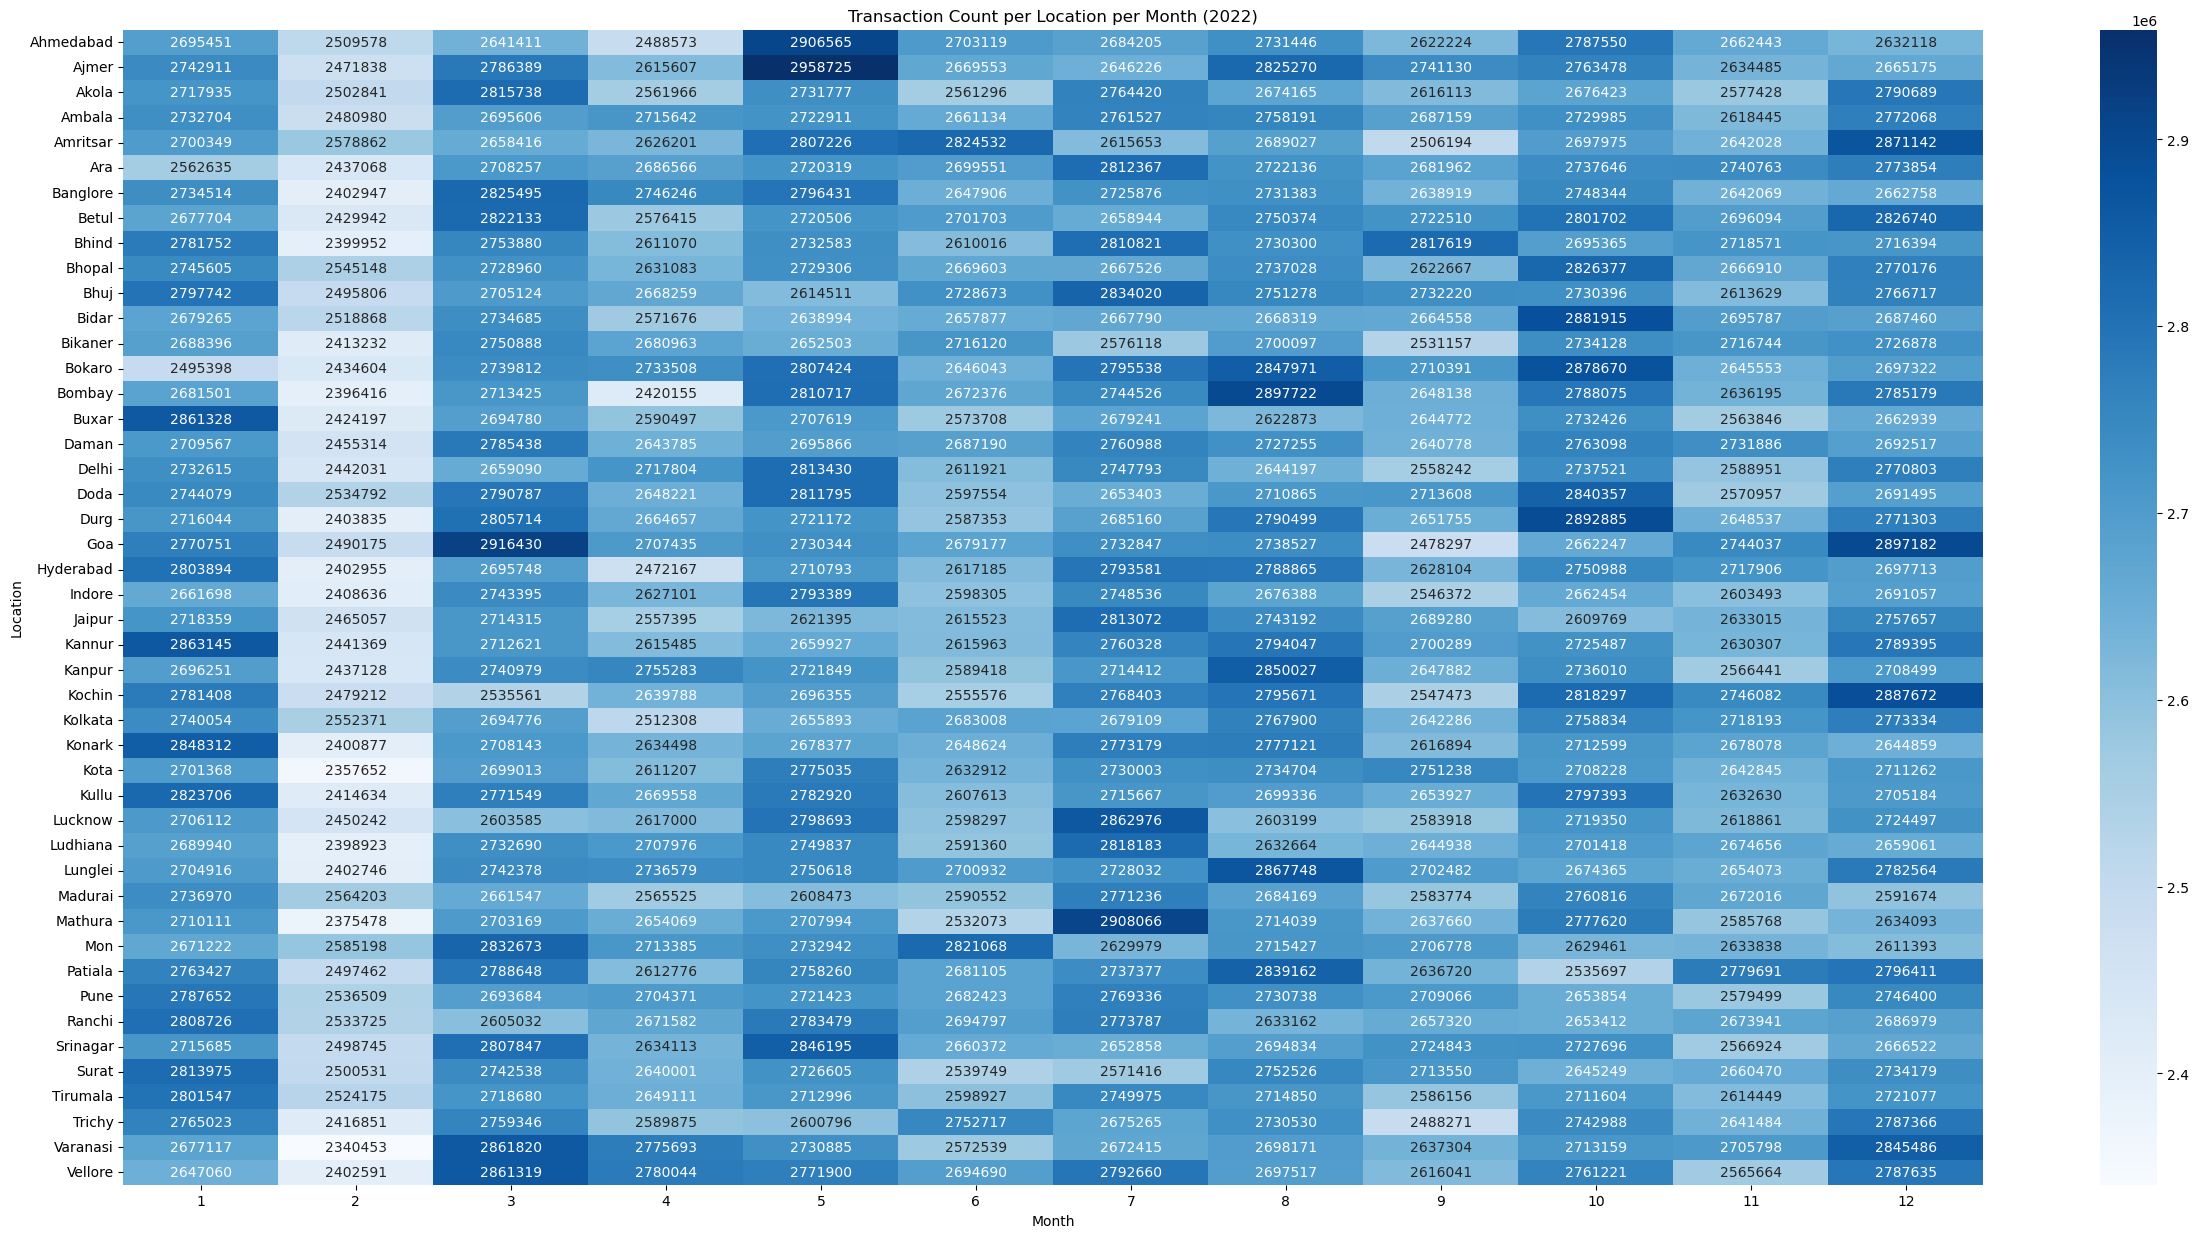

In [12]:
pivot_table = data.pivot_table(
    index="Location",       
    columns="Month",        
    values="Transaction_count", 
    aggfunc="sum"           
)
# Heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("Transaction Count per Location per Month (2022)")
plt.ylabel("Location")
plt.xlabel("Month")
plt.show()

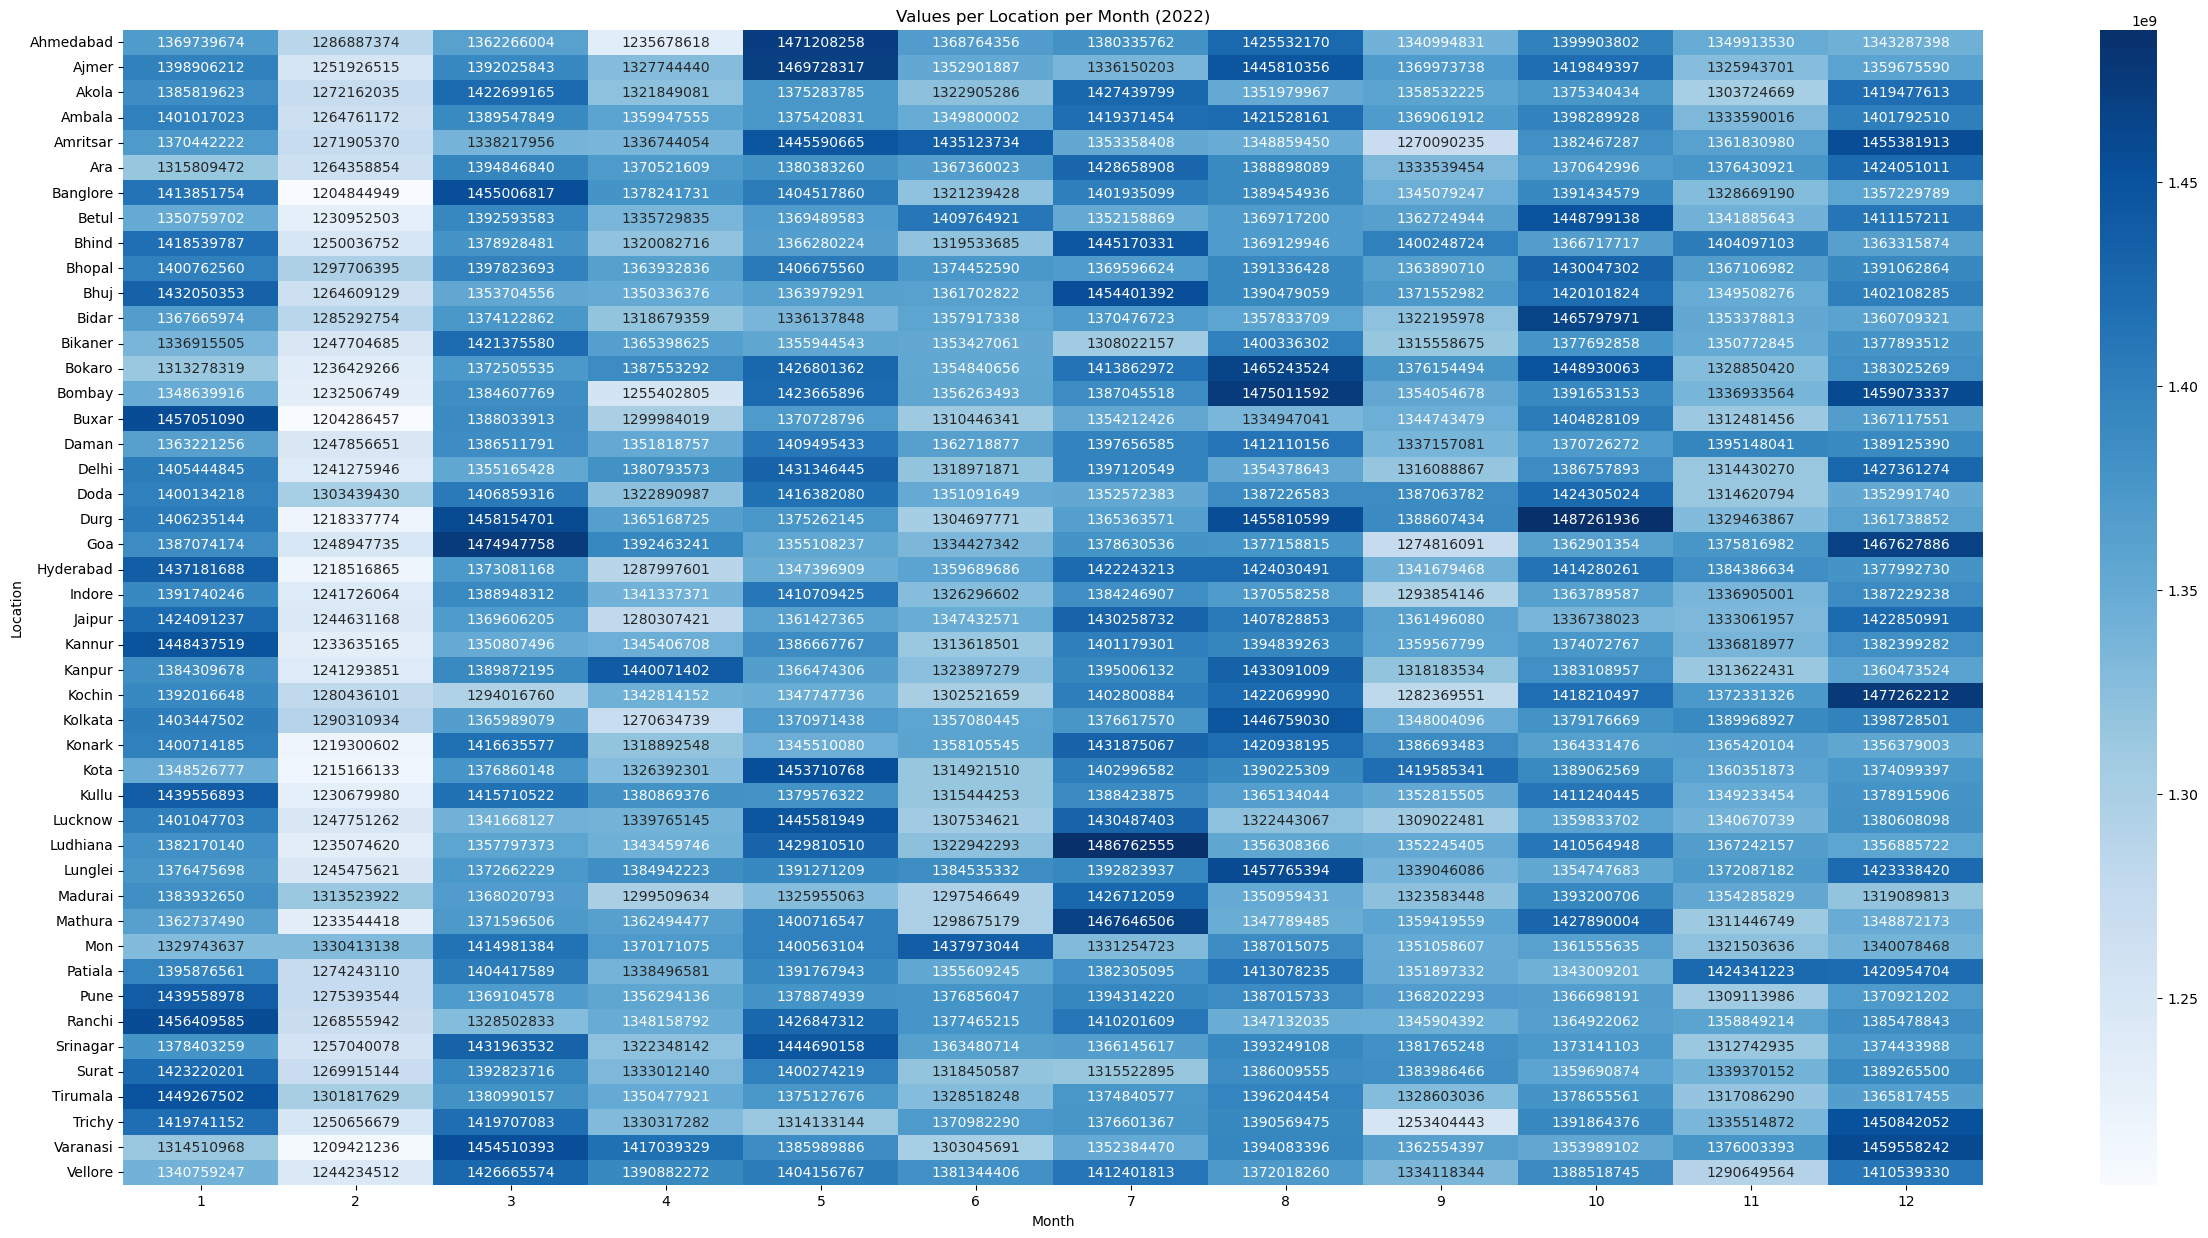

In [13]:
pivot_table = data.pivot_table(
    index="Location",        
    columns="Month", 
    values="Value", 
    aggfunc="sum"        
)

#  Heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues")
plt.title("Values per Location per Month (2022)")
plt.ylabel("Location")
plt.xlabel("Month")
plt.show()

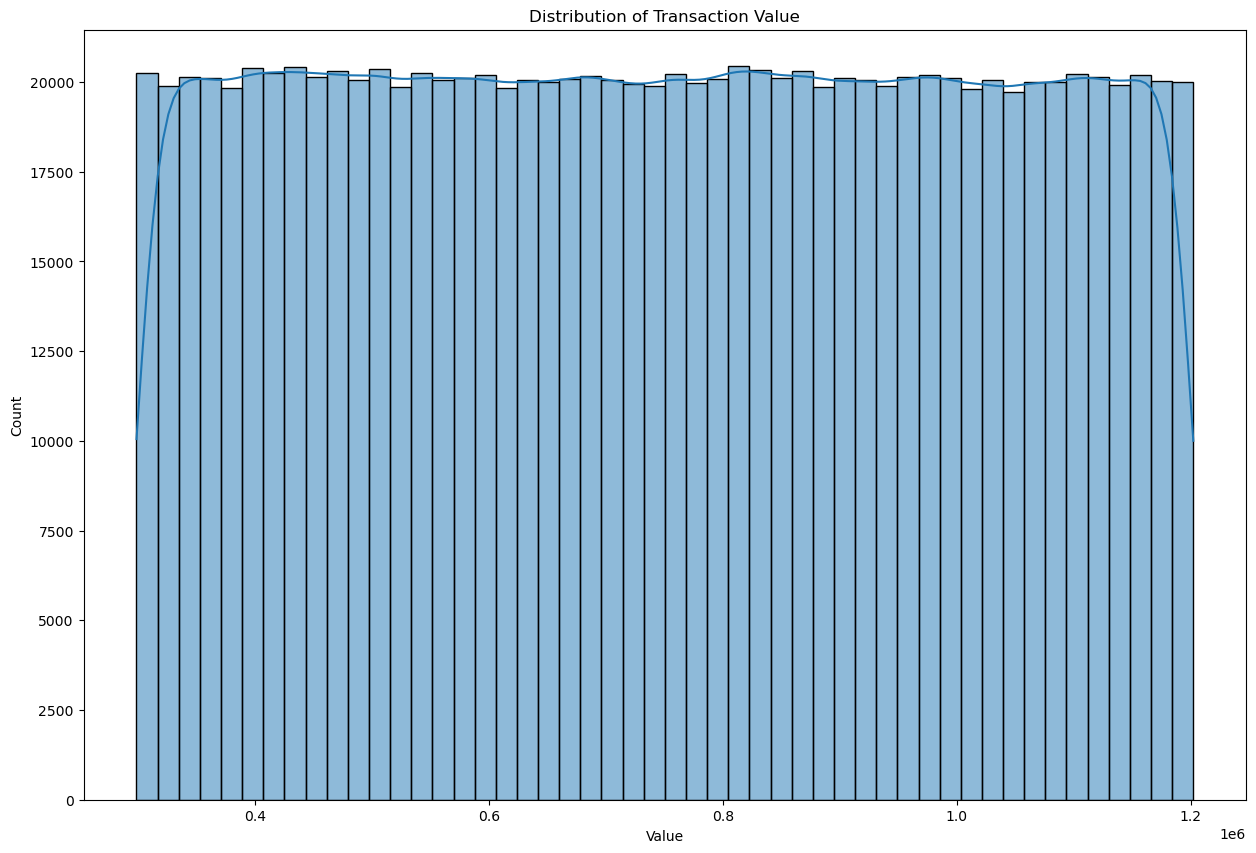

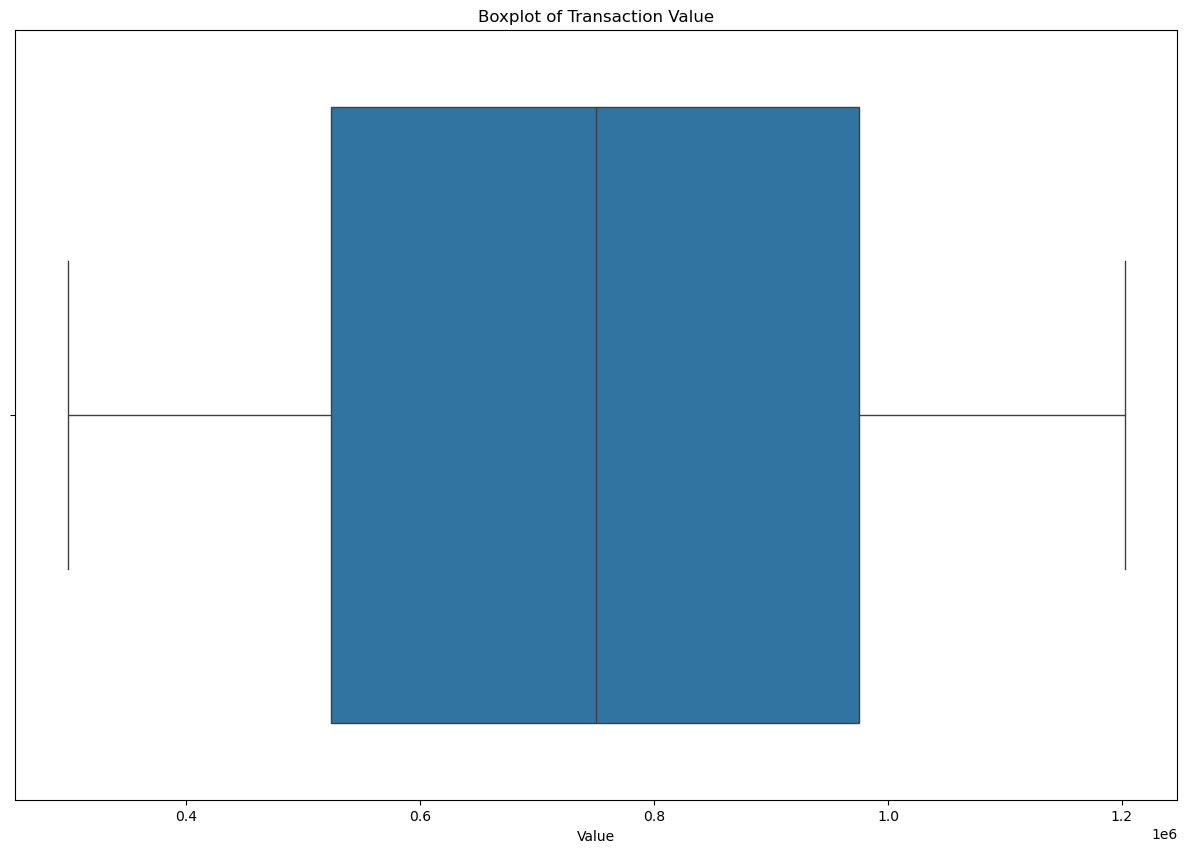

In [14]:

plt.figure(figsize=(15,10))
sns.histplot(data["Value"], bins=50, kde=True)
plt.title("Distribution of Transaction Value")
plt.show()

plt.figure(figsize=(15,10))
sns.boxplot(x=data["Value"])
plt.title("Boxplot of Transaction Value")
plt.show()

# Value per Domain

In [15]:
data_per_domain_value = data.groupby('Domain')['Value'].sum().reset_index().sort_values(by='Value',ascending=False)
data_per_domain_value

,Domain,Value
4,PUBLIC,107791432924
3,MEDICAL,107790980756
1,INTERNATIONAL,107724396447
0,EDUCATION,107658704394
2,INVESTMENTS,107613592821
5,RESTRAUNT,107498499345
6,RETAIL,107129506265


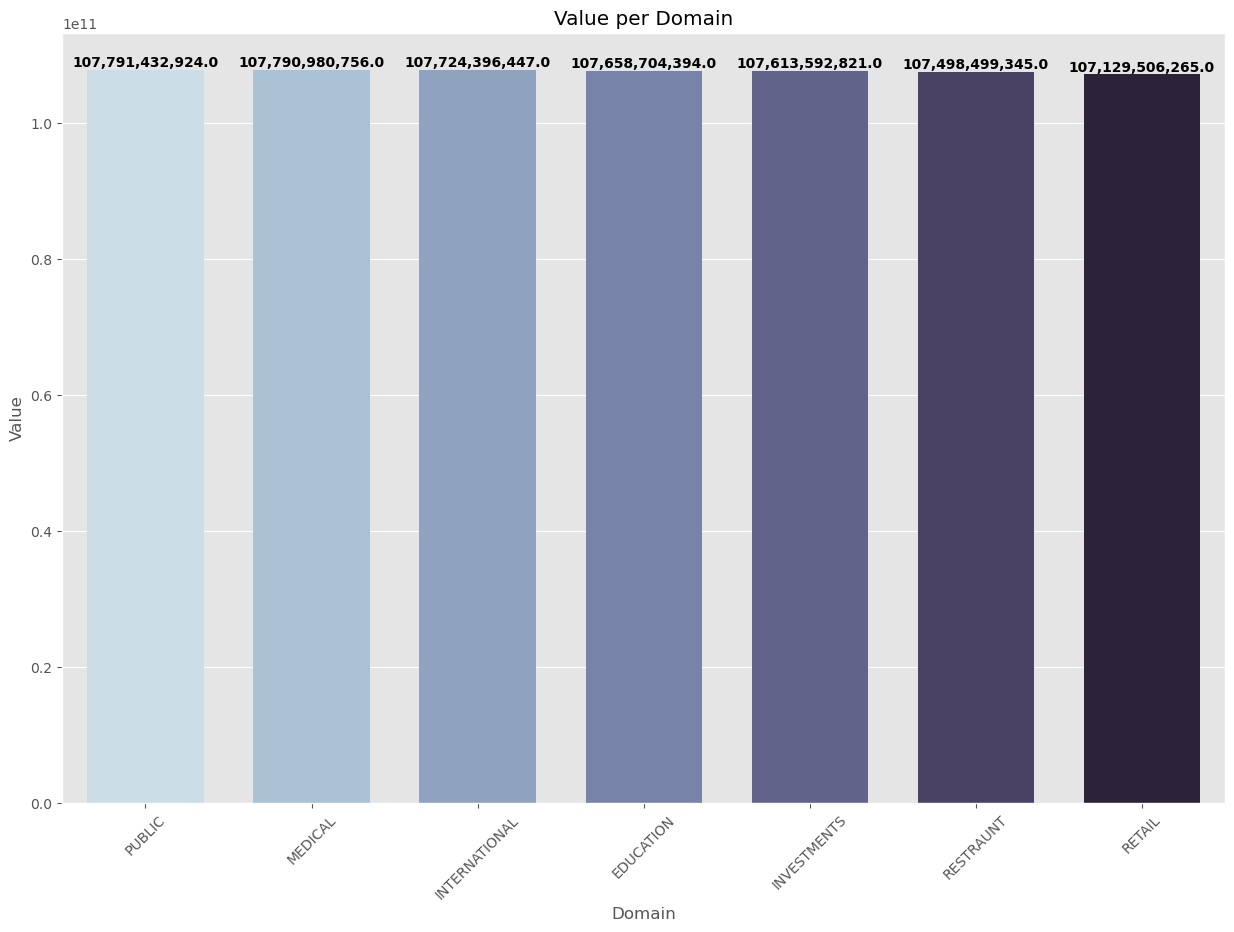

In [16]:
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
ax=sns.barplot(data=data_per_domain_value,x='Domain',y='Value',width=.7,palette="ch:s=.25,rot=-.25")
bars(ax)
plt.xticks(rotation=45)
plt.title("Value per Domain")
plt.show()

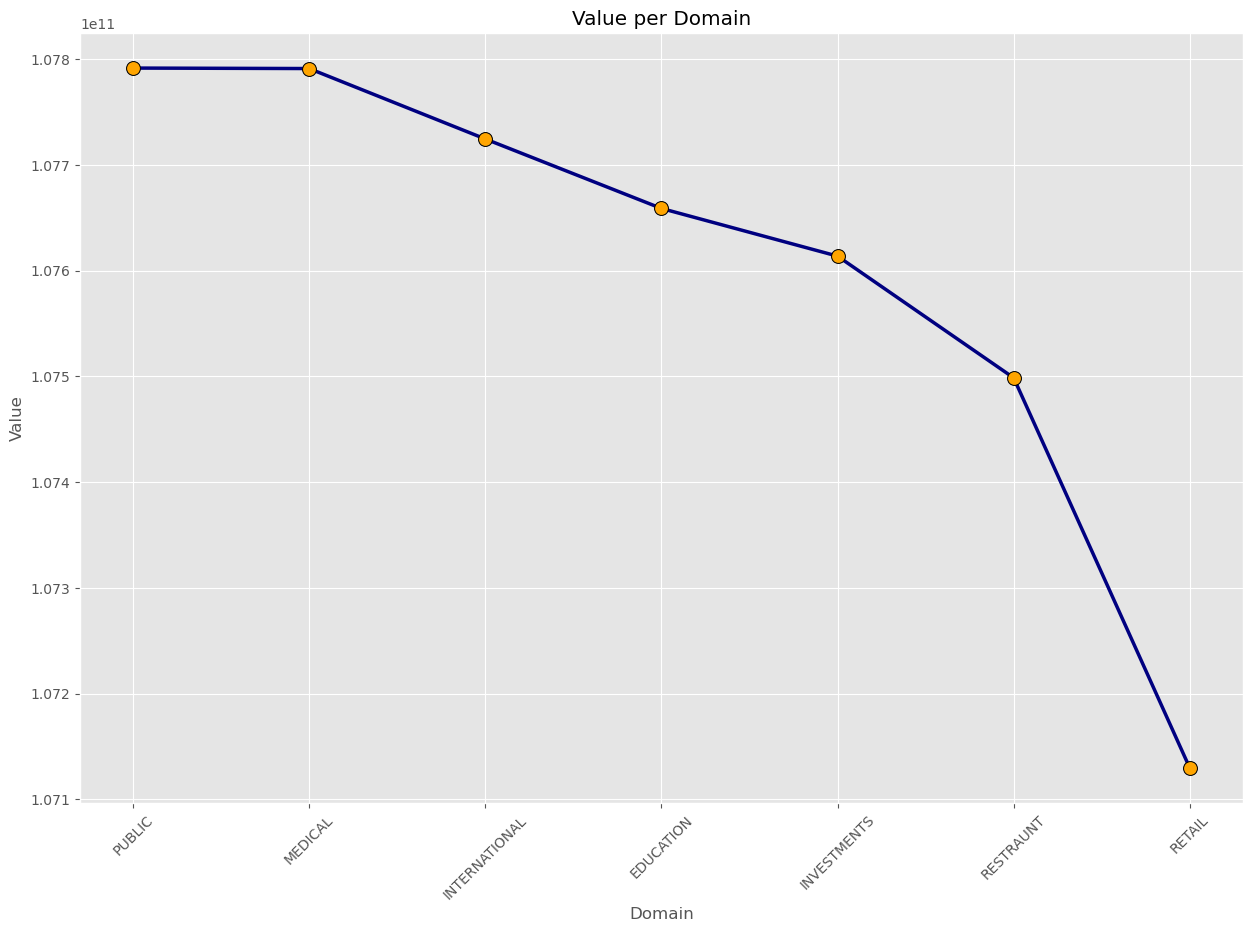

In [17]:
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
ax=sns.lineplot(data=data_per_domain_value,x='Domain',y='Value',ms=10,lw=2.5,c='navy',marker='o',markerfacecolor='orange',markeredgecolor='black',)
plt.xticks(rotation=45)
plt.title("Value per Domain")
plt.show()

## The total values are very close across all domains (around 107–108B).

## PUBLIC has the highest total value, while RETAIL is the lowest.

## The difference between highest and lowest is less than 1%, which suggests the dataset might be balanced or evenly distributed across domains.

## Because values are so close, it’s important to also compare Transaction_count a domain could have fewer transactions but higher value per transaction.

# Transaction Count per Domain

In [18]:
data_per_domain_transaction = data.groupby('Domain')['Transaction_count'].sum().reset_index().sort_values(by='Transaction_count',ascending=False)


In [19]:
data_per_domain_transaction

,Domain,Transaction_count
4,PUBLIC,212214482
1,INTERNATIONAL,212147527
2,INVESTMENTS,211532374
0,EDUCATION,211454073
5,RESTRAUNT,211232735
3,MEDICAL,211186104
6,RETAIL,210643016


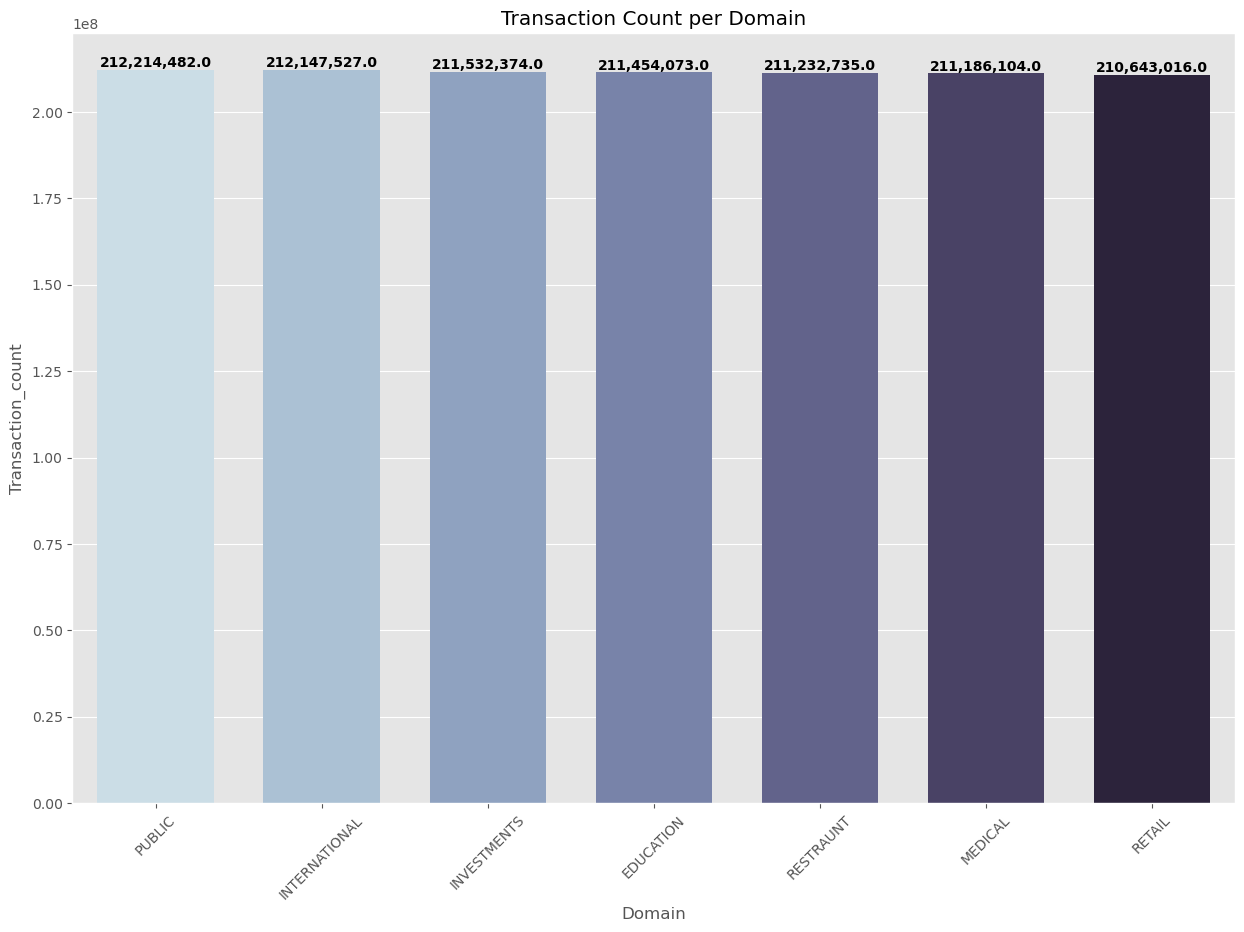

In [20]:
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
ax=sns.barplot(data=data_per_domain_transaction,x='Domain',y='Transaction_count',width=.7,palette="ch:s=.25,rot=-.25")
bars(ax)
plt.xticks(rotation=45)
plt.title("Transaction Count per Domain")
plt.show()

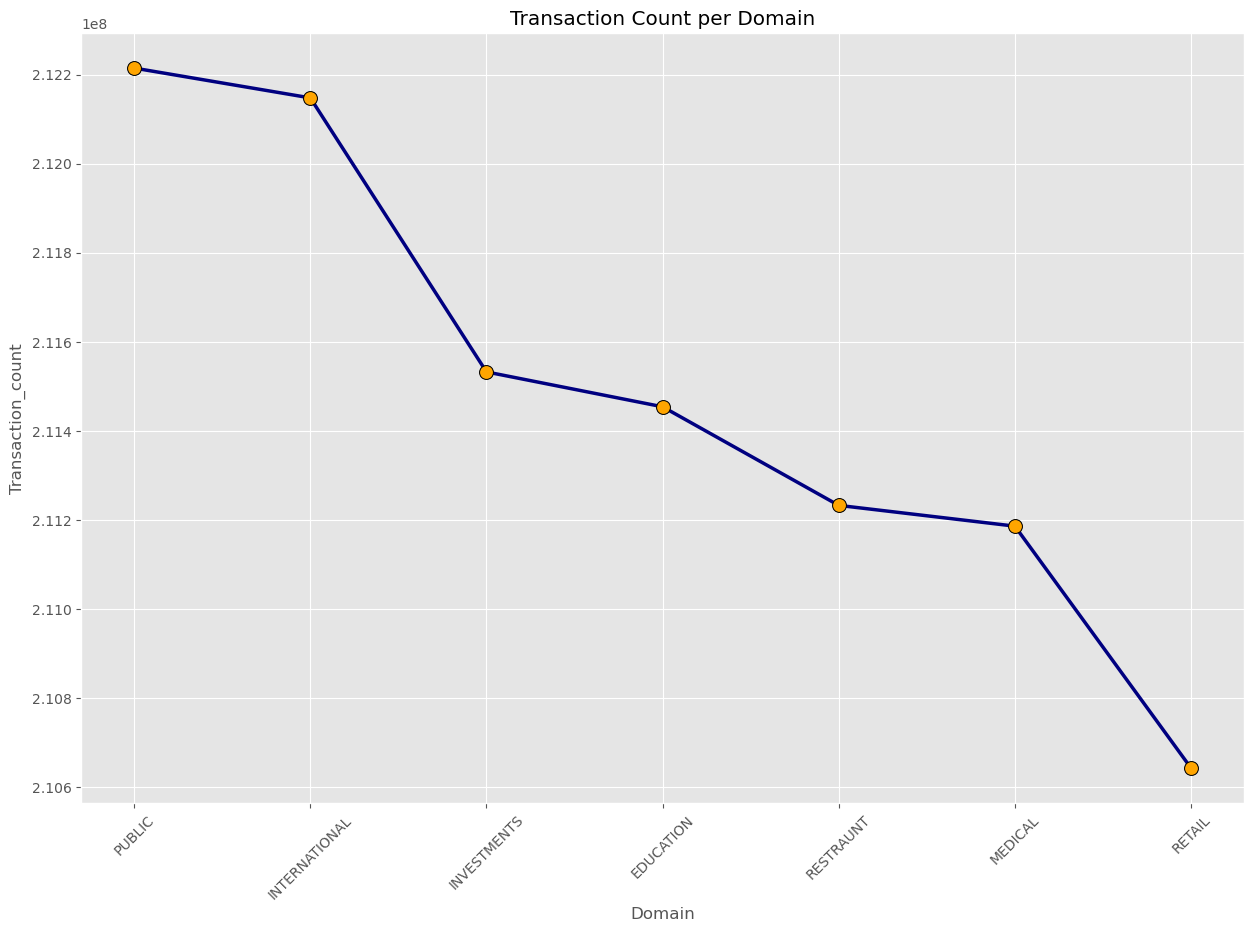

In [21]:
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
ax=sns.lineplot(data=data_per_domain_transaction,x='Domain',y='Transaction_count',ms=10,lw=2.5,c='navy',marker='o',markerfacecolor='orange',markeredgecolor='black',)
plt.xticks(rotation=45)
plt.title("Transaction Count per Domain")
plt.show()

## Both Value and Transaction_count are extremely close across domains → again suggests balanced dataset.

## PUBLIC leads in both Value and Transactions, but only slightly.

## RETAIL is consistently lowest in both metrics.

## Differences are very small:

## Max vs Min in Value ≈ 661M difference (~0.6%).

## Max vs Min in Transactions ≈ 1.57M difference (~0.7%).



In [22]:
data['Date'].head()

0   2022-01-01
1   2022-01-01
2   2022-01-01
3   2022-01-01
4   2022-01-01
Name: Date, dtype: datetime64[ns]

In [23]:
data['Year'].nunique()

1

In [24]:
data

,Date,Domain,Location,Value,Transaction_count,Year,Month
0,2022-01-01,RESTRAUNT,Bhuj,365554,1932,2022,1
1,2022-01-01,INVESTMENTS,Ludhiana,847444,1721,2022,1
2,2022-01-01,RETAIL,Goa,786941,1573,2022,1
3,2022-01-01,INTERNATIONAL,Mathura,368610,2049,2022,1
4,2022-01-01,RESTRAUNT,Madurai,615681,1519,2022,1
...,...,...,...,...,...,...,...
1004475,2022-12-31,INTERNATIONAL,Konark,738557,754,2022,12
1004476,2022-12-31,INVESTMENTS,Pune,668180,1572,2022,12
1004477,2022-12-31,RETAIL,Durg,1000349,2155,2022,12
1004478,2022-12-31,INTERNATIONAL,Mathura,1026547,2458,2022,12


In [25]:
data['Location'].nunique()

46

# value per location

In [26]:
data_per_location_value = data.groupby('Location')['Value'].sum().reset_index().sort_values(by='Value',ascending=False)


In [27]:
data_per_location_value.head(60)

,Location,Value
9,Bhopal,16554394544
19,Durg,16516102519
10,Bhuj,16514534345
13,Bokaro,16507475172
37,Patiala,16495996819
33,Lunglei,16495171014
3,Ambala,16484128413
1,Ajmer,16450636199
20,Goa,16429920151
16,Daman,16423546290


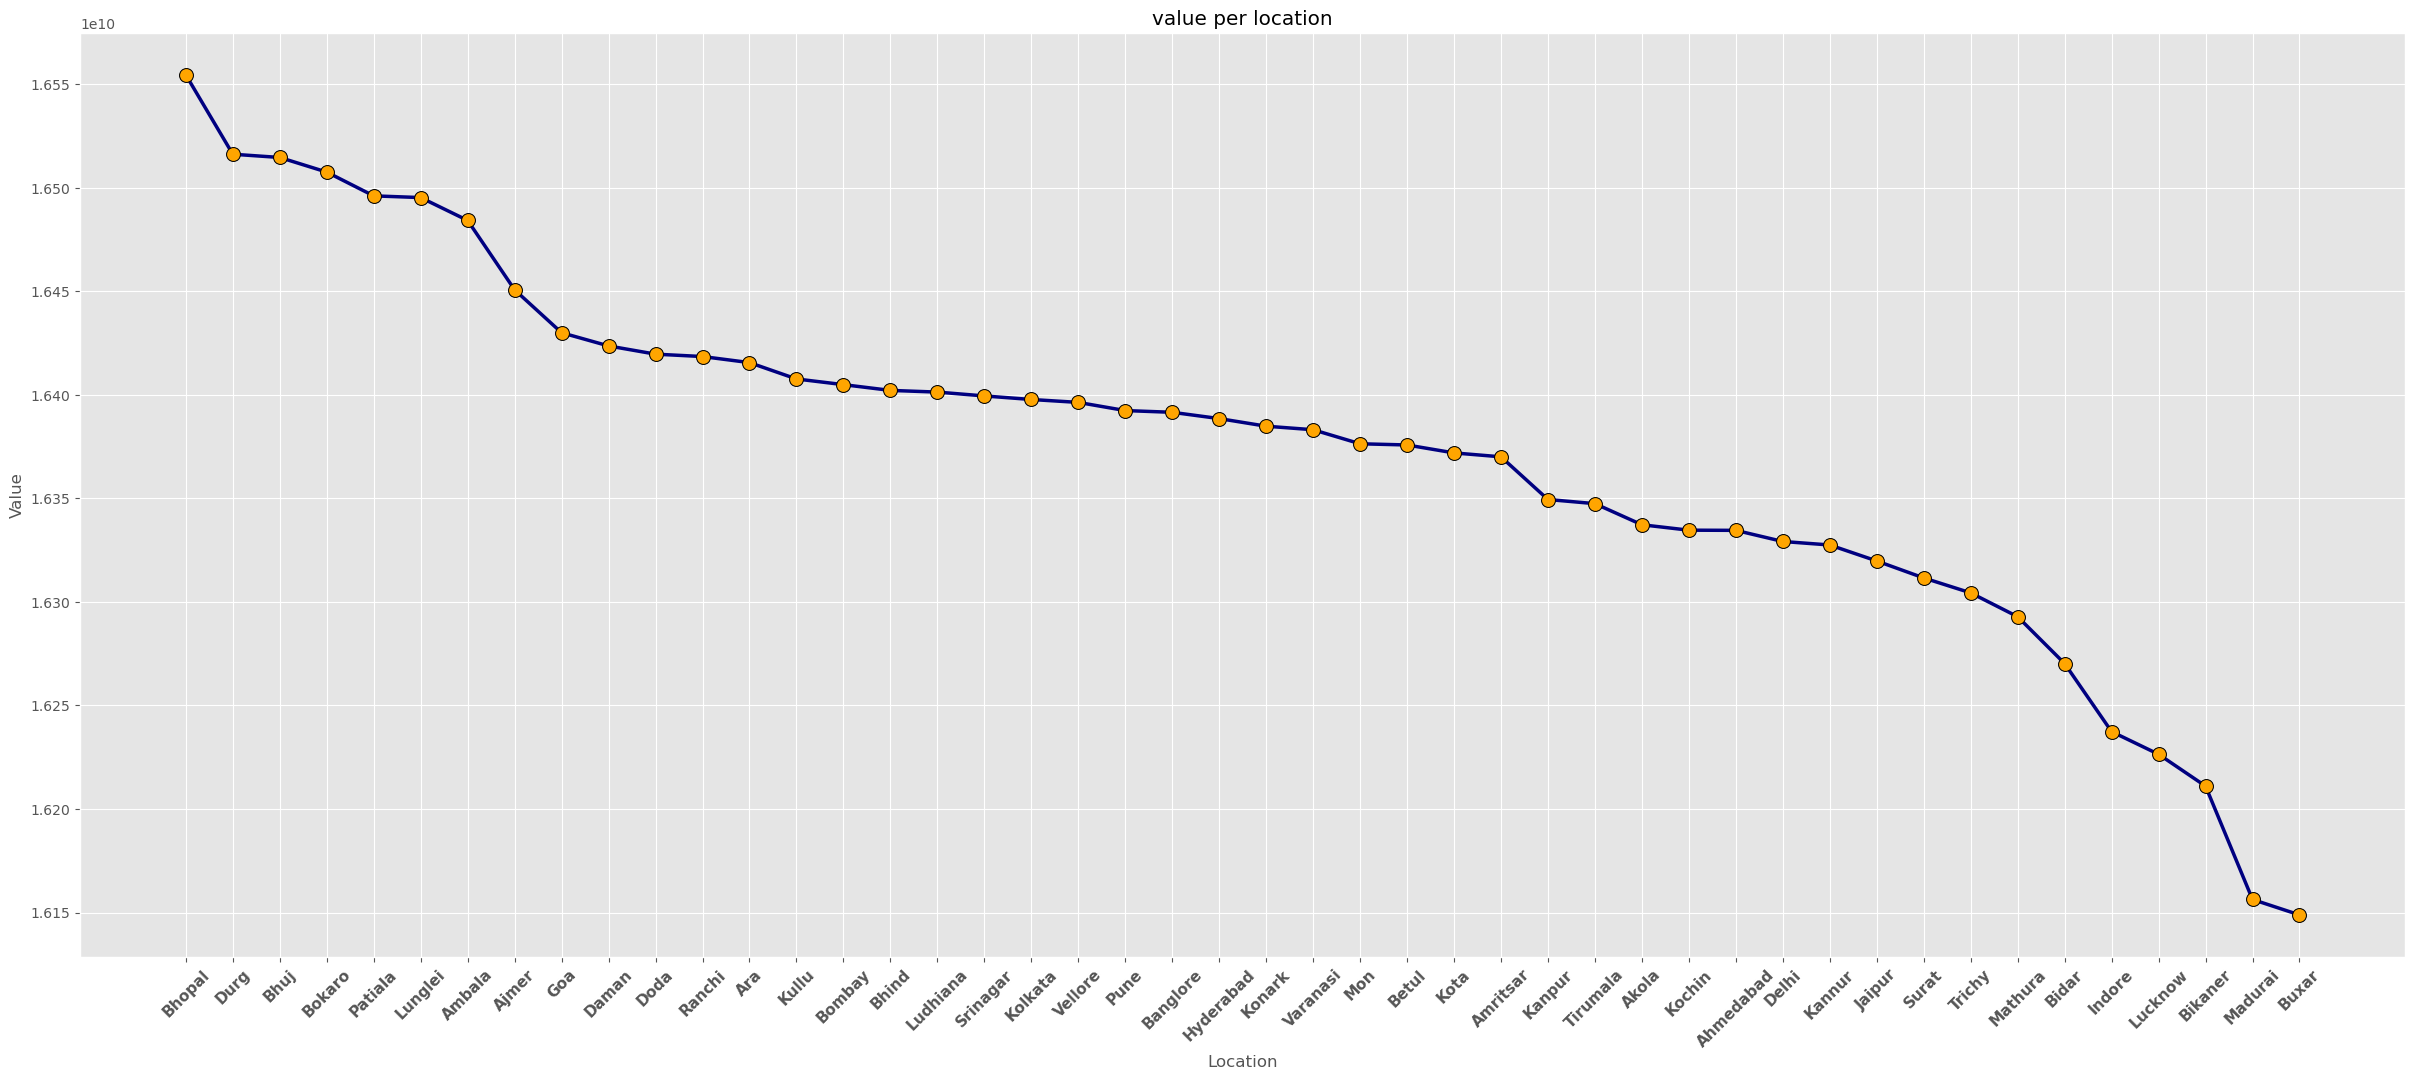

In [28]:
plt.figure(figsize=(30,12))
plt.style.use("ggplot")
ax=sns.lineplot(data=data_per_location_value,x='Location',y='Value',ms=10,lw=2.5,c='navy',marker='o',markerfacecolor='orange',markeredgecolor='black',)
plt.xticks(rotation=45)
plt.title("value per location")
plt.xticks(fontsize=11,fontweight='bold')
plt.show()

## The values are again very close (16.15–16.55B), just like we saw with Domains.

## Bhopal is the top location with ~16.55B.

## Buxar is the lowest here with ~16.15B.

## The difference between top and bottom is only ~356M (≈2.1%)
## With totals so close, raw values don’t reveal much variation → we need to compare Transaction_count per Location to check if some cities have fewer but higher-value transactions.

# Transaction_count per location

In [29]:
data_per_location_Transaction = data.groupby('Location')['Transaction_count'].sum().reset_index().sort_values(by='Transaction_count',ascending=False)


In [30]:
data_per_location_Transaction.head(60)

,Location,Transaction_count
20,Goa,32547449
1,Ajmer,32520787
33,Lunglei,32447433
10,Bhuj,32438375
13,Bokaro,32432234
37,Patiala,32426736
7,Betul,32384767
45,Vellore,32378342
8,Bhind,32378323
9,Bhopal,32340389


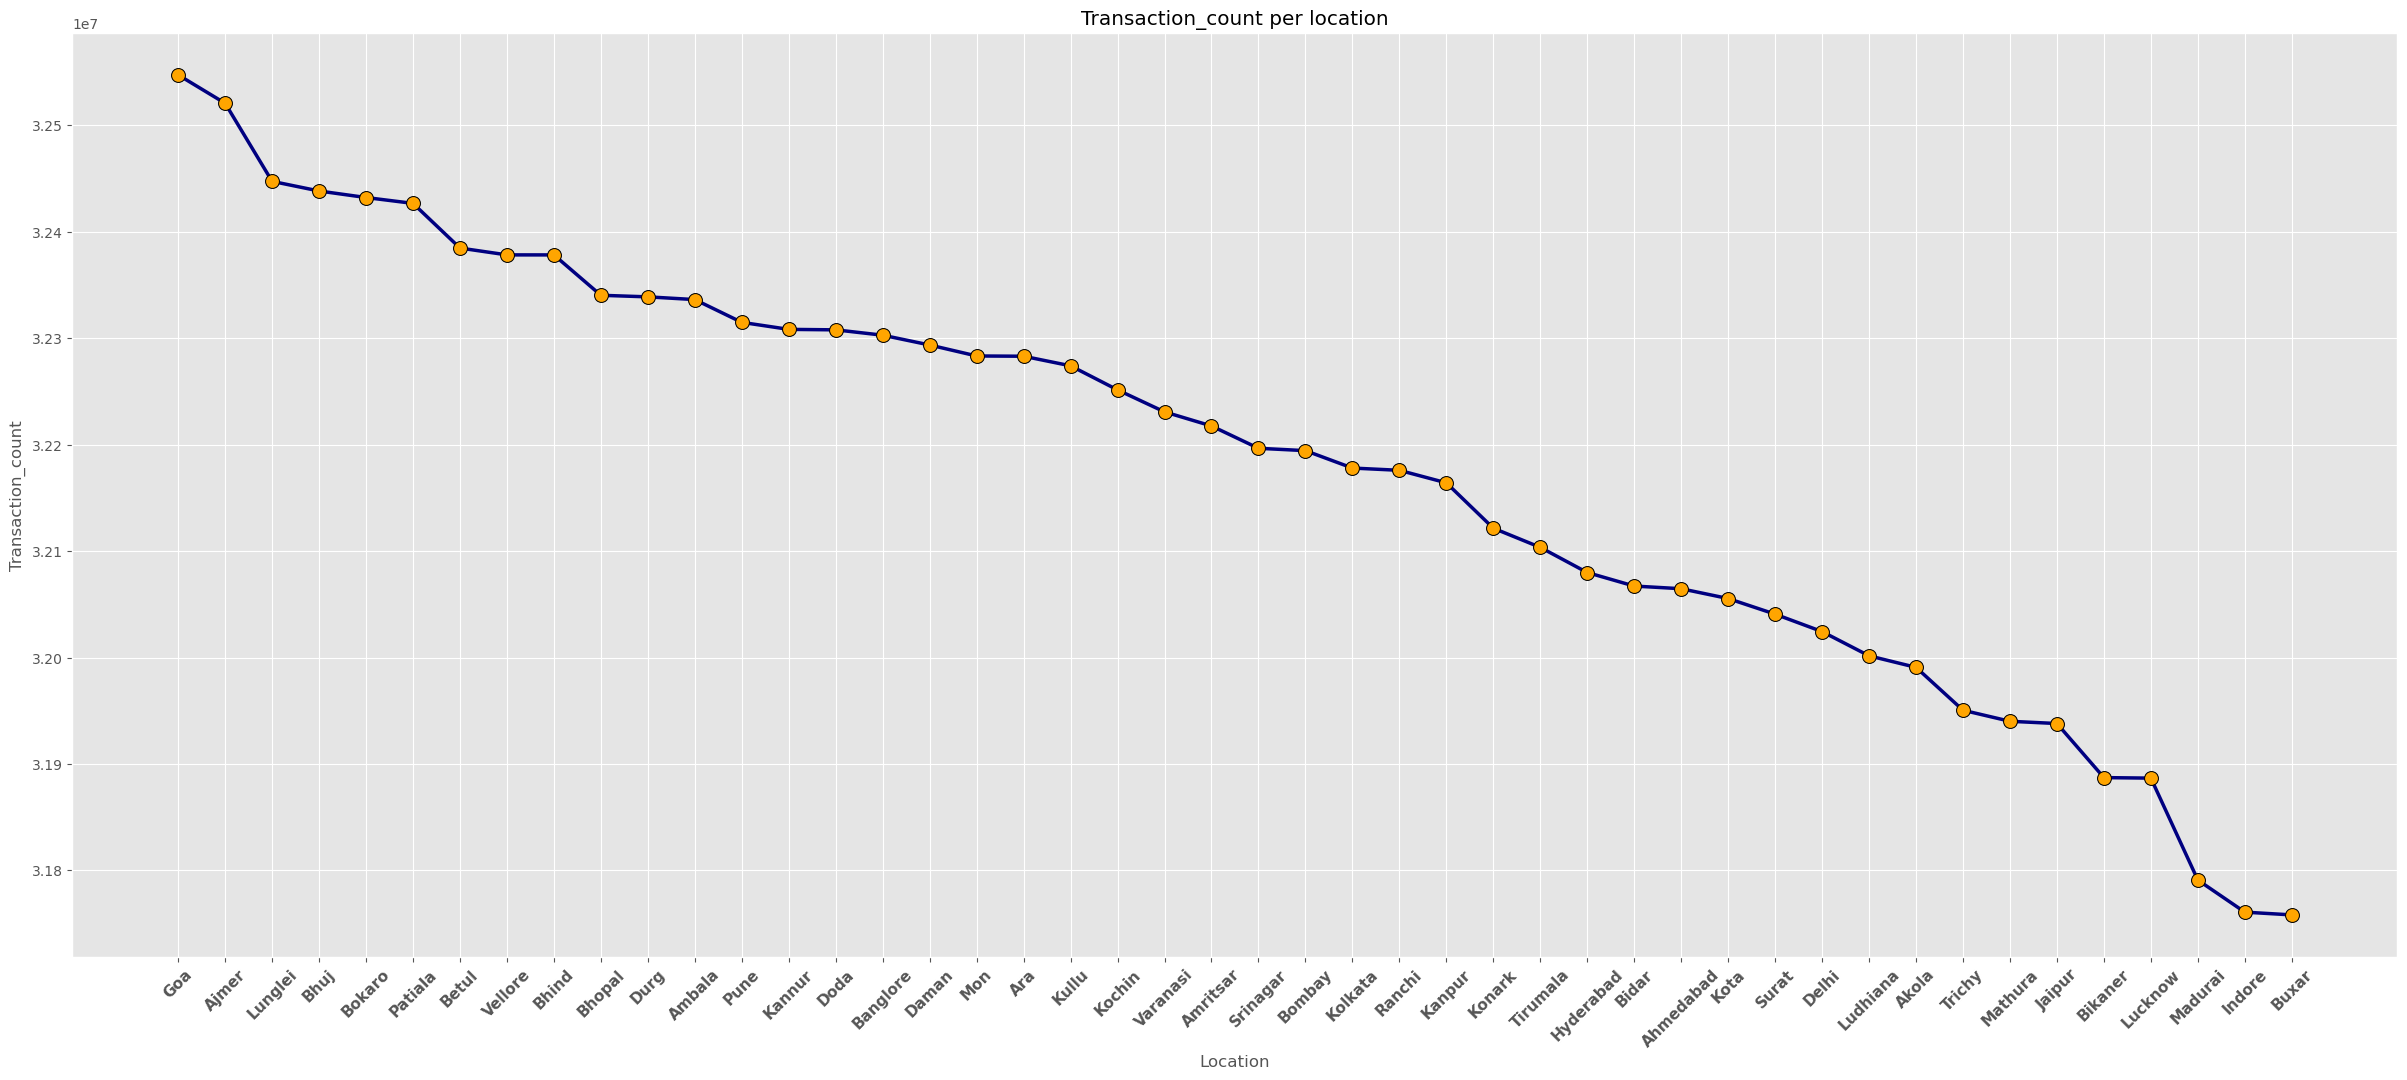

In [31]:
plt.figure(figsize=(30,12))
plt.style.use("ggplot")
ax=sns.lineplot(data=data_per_location_Transaction,x='Location',y='Transaction_count',ms=10,lw=2.5,c='navy',marker='o',markerfacecolor='orange',markeredgecolor='black',)
plt.xticks(rotation=45)
plt.title("Transaction_count per location")
plt.xticks(fontsize=11,fontweight='bold')
plt.show()

## Transaction counts are all very close → ranging between 31.76M (Buxar) and 32.55M (Goa).

## Goa ranks highest with ~32.55M transactions.

## Buxar is the lowest with ~31.76M.

## The gap between top and bottom is only ~1.87M (~5.7%), showing limited variation across locations.

## Ajmer, Lunglei, Bhuj, and Bokaro also appear near the top, just slightly below Goa.

## Bhopal (which led in Value) is mid-ranked in Transactions (~32.34M) → implying larger average transaction size.



In [32]:
data

,Date,Domain,Location,Value,Transaction_count,Year,Month
0,2022-01-01,RESTRAUNT,Bhuj,365554,1932,2022,1
1,2022-01-01,INVESTMENTS,Ludhiana,847444,1721,2022,1
2,2022-01-01,RETAIL,Goa,786941,1573,2022,1
3,2022-01-01,INTERNATIONAL,Mathura,368610,2049,2022,1
4,2022-01-01,RESTRAUNT,Madurai,615681,1519,2022,1
...,...,...,...,...,...,...,...
1004475,2022-12-31,INTERNATIONAL,Konark,738557,754,2022,12
1004476,2022-12-31,INVESTMENTS,Pune,668180,1572,2022,12
1004477,2022-12-31,RETAIL,Durg,1000349,2155,2022,12
1004478,2022-12-31,INTERNATIONAL,Mathura,1026547,2458,2022,12


# Values per Month

In [33]:
data_per_month_values = data.groupby('Month')['Value'].sum().reset_index().sort_values(by='Value',ascending=False)


In [34]:
data_per_month_values

,Month,Value
7,8,64089898237
6,7,64049593378
4,5,64015382961
11,12,63988218984
9,10,63986742181
0,1,63967235967
2,3,63876884769
5,6,61932318745
10,11,61927606668
8,9,61911190101


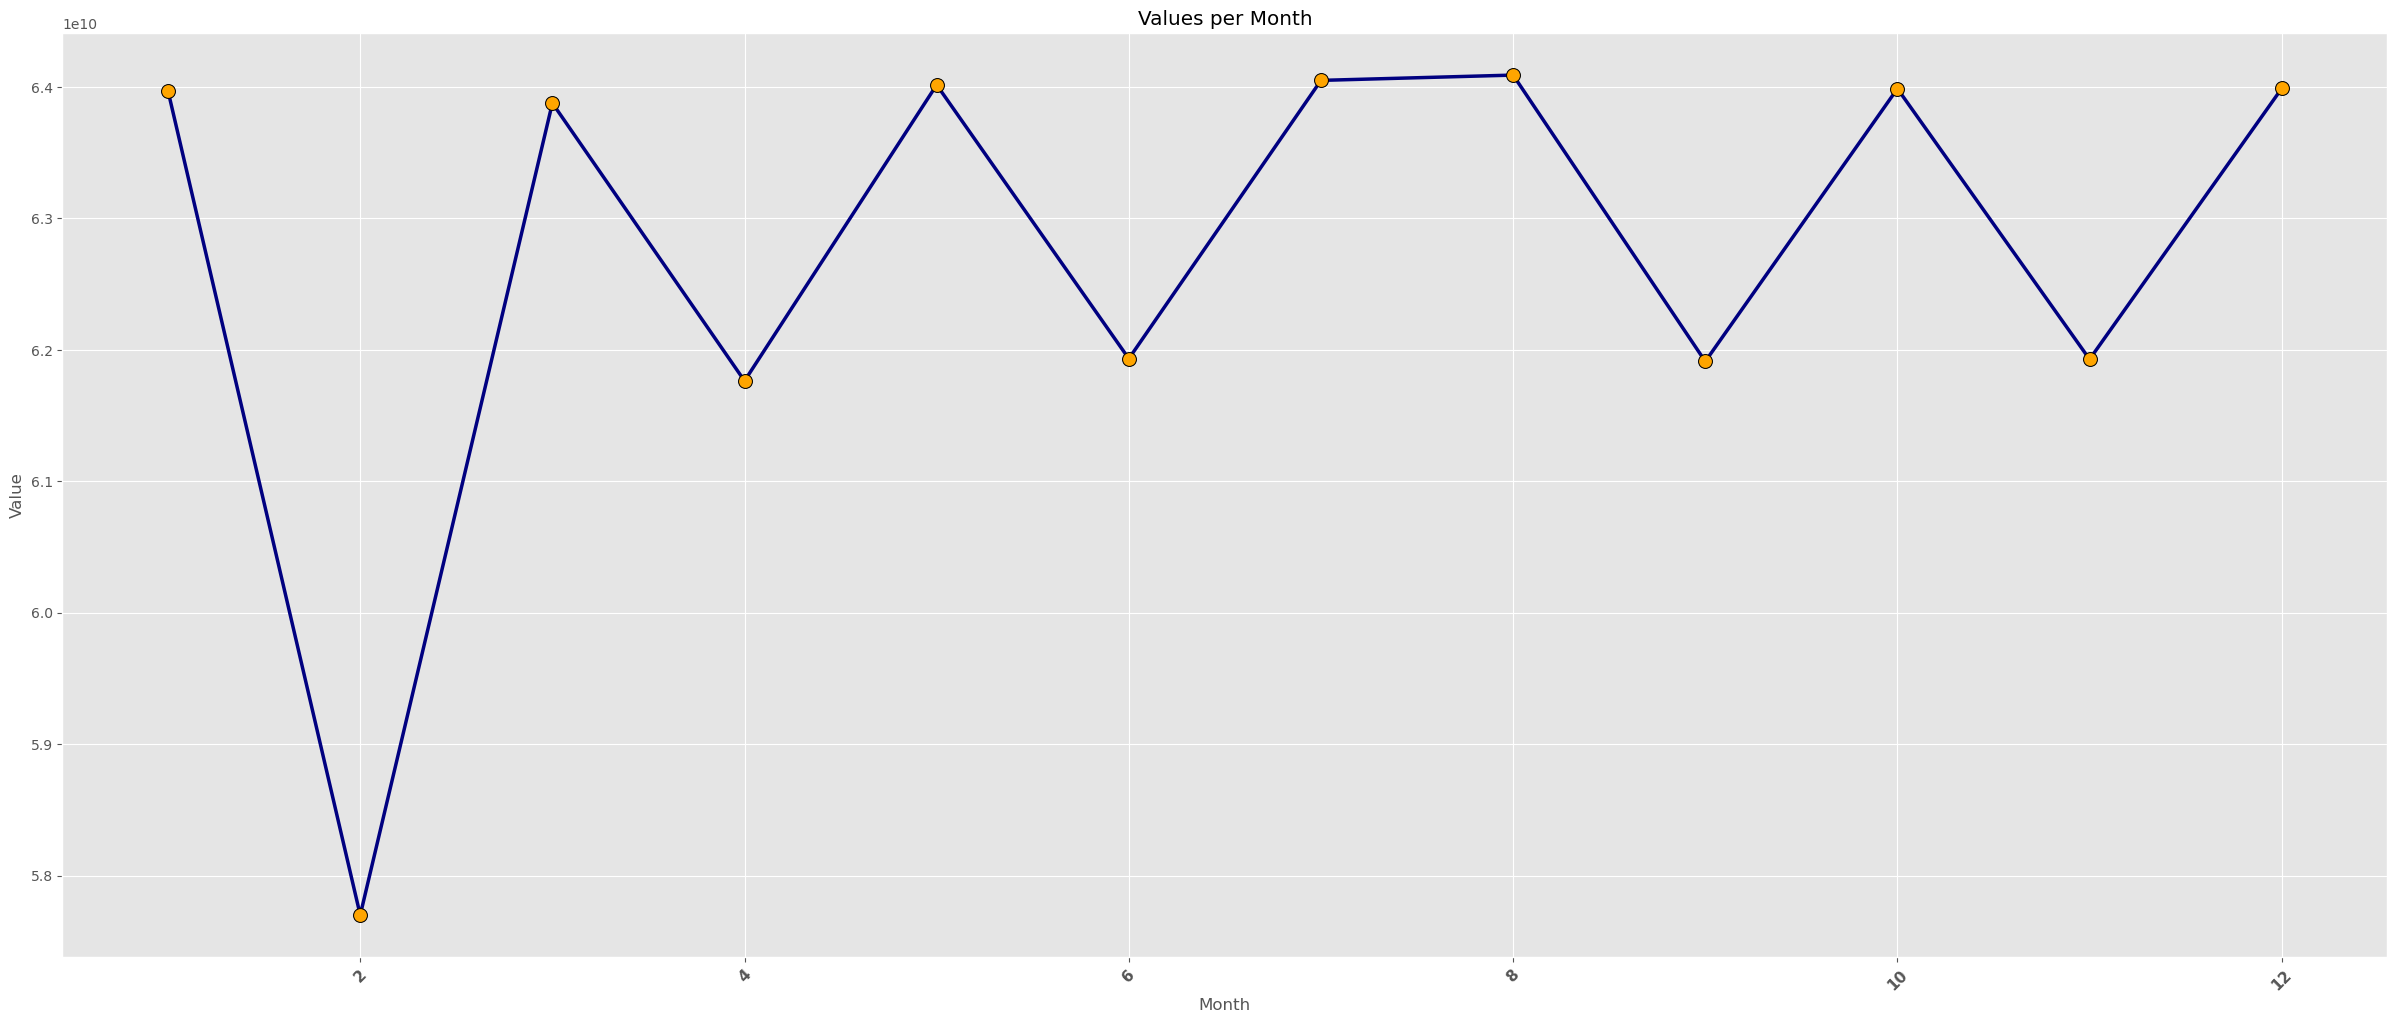

In [35]:
plt.figure(figsize=(30,12))
plt.style.use("ggplot")
ax=sns.lineplot(data=data_per_month_values,x='Month',y='Value',ms=10,lw=2.5,c='navy',marker='o',markerfacecolor='orange',markeredgecolor='black',)
plt.xticks(rotation=45)
plt.title("Values per Month")
plt.xticks(fontsize=11,fontweight='bold')
plt.show()

## Values range between ~57.7B (lowest) and ~64.1B (highest).

## Month 8  had the highest total (~64.09B).

## Month 1  had the lowest (~57.7B).

## Overall, the monthly values are fairly close, but there’s about 6.4B difference (~10%) between peak and lowest month.


# Transaction_count per Month

In [36]:
data_per_month_Transaction_count = data.groupby('Month')['Transaction_count'].sum().reset_index().sort_values(by='Transaction_count',ascending=False)


In [37]:
data_per_month_Transaction_count

,Month,Transaction_count
4,5,125927753
2,3,125863514
9,10,125794532
7,8,125784910
11,12,125772878
6,7,125634840
0,1,125605924
10,11,121951480
5,6,121782133
8,9,121682979


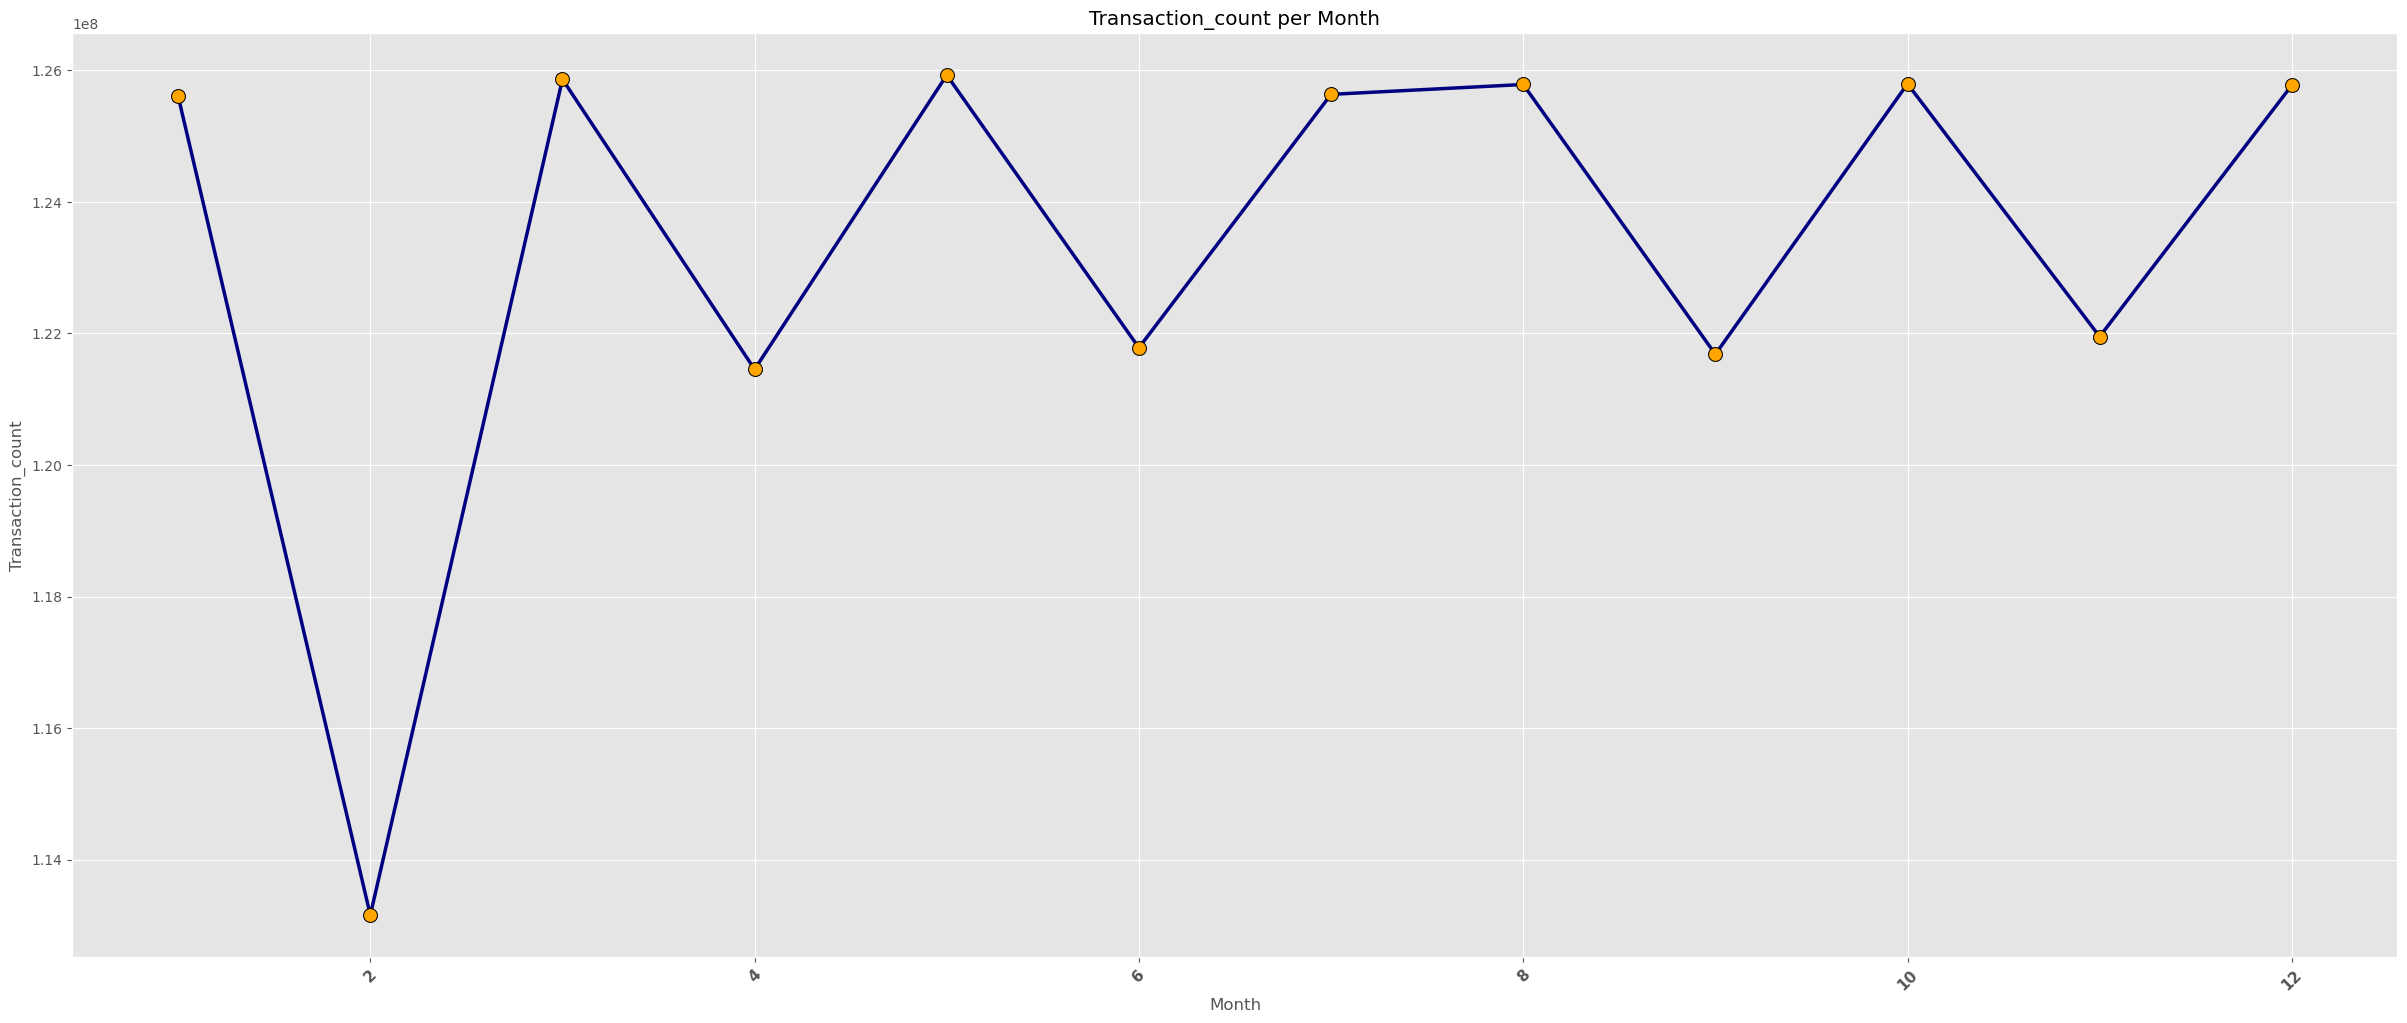

In [38]:
plt.figure(figsize=(30,12))
plt.style.use("ggplot")
ax=sns.lineplot(data=data_per_month_Transaction_count,x='Month',y='Transaction_count',ms=10,lw=2.5,c='navy',marker='o',markerfacecolor='orange',markeredgecolor='black',)
plt.xticks(rotation=45)
plt.title("Transaction_count per Month")
plt.xticks(fontsize=11,fontweight='bold')
plt.show()

## August (Month 8) is the strongest by total Value (~64.1B), with very high transaction volume (~125.8M).

## February (Month 1) is the weakest by total Value (~57.7B), with the lowest transactions (~113.1M).

## Average transaction values are quite stable (~507–526), except for:

## Month 5 shows a slightly higher average (~525.7).

## Month 6 dips lower (~493).



In [39]:
data

,Date,Domain,Location,Value,Transaction_count,Year,Month
0,2022-01-01,RESTRAUNT,Bhuj,365554,1932,2022,1
1,2022-01-01,INVESTMENTS,Ludhiana,847444,1721,2022,1
2,2022-01-01,RETAIL,Goa,786941,1573,2022,1
3,2022-01-01,INTERNATIONAL,Mathura,368610,2049,2022,1
4,2022-01-01,RESTRAUNT,Madurai,615681,1519,2022,1
...,...,...,...,...,...,...,...
1004475,2022-12-31,INTERNATIONAL,Konark,738557,754,2022,12
1004476,2022-12-31,INVESTMENTS,Pune,668180,1572,2022,12
1004477,2022-12-31,RETAIL,Durg,1000349,2155,2022,12
1004478,2022-12-31,INTERNATIONAL,Mathura,1026547,2458,2022,12


# Pie Chart of Value  and Transaction count per Domain

In [40]:
data_per_month_value_location = data.groupby(['Month','Location'])['Value'].sum().reset_index().sort_values(by='Value',ascending=False)


In [41]:
data_per_month_value_location

,Month,Location,Value
433,10,Durg,1487261936
308,7,Ludhiana,1486762555
532,12,Kochin,1477262212
336,8,Bombay,1475011592
112,3,Goa,1474947758
...,...,...,...
65,2,Durg,1218337774
75,2,Kota,1215166133
90,2,Varanasi,1209421236
52,2,Banglore,1204844949


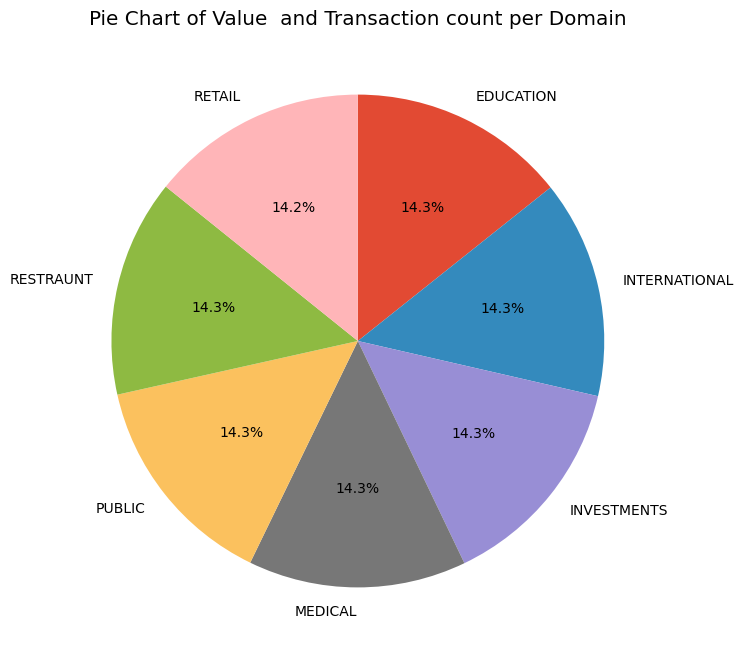

In [42]:
data_percent_value = data.groupby('Domain')[["Transaction_count","Value"]].sum().reset_index()

plt.figure(figsize=(8,8))

plt.pie(
    data_percent_value['Value'],
    labels=data_percent_value['Domain'],
    autopct='%1.1f%%',
    startangle=90, 
    counterclock=False   
)

plt.title("Pie Chart of Value  and Transaction count per Domain")
plt.show()

# This means that the values and Transaction count are ultimately equal in the Domains.

In [43]:
data['Month'].value_counts()

Month
1     85312
3     85312
7     85312
5     85312
12    85312
10    85312
8     85312
4     82560
9     82560
6     82560
11    82560
2     77056
Name: count, dtype: int64

In [44]:
data['Domain'].value_counts(normalize=True)*100

Domain
INTERNATIONAL    14.321141
PUBLIC           14.317756
INVESTMENTS      14.296651
EDUCATION        14.292768
MEDICAL          14.288687
RESTRAUNT        14.256929
RETAIL           14.226067
Name: proportion, dtype: float64

In [45]:
data.to_excel('Bank Dataset.xlsx',index=False)